In [1]:
import import_ipynb
import Scanpy_functions_v03262021 as sc_pipe
import scvelo as scv
scv.logging.print_version()
import warnings
import scirpy as ir
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import bbknn
import logging
from sklearn.mixture import GaussianMixture
from scipy.stats     import norm
import glob
import os
import hvplot.pandas
import docx
from docx import Document
from docx.shared import Inches
from docx.shared import Pt
from scipy import sparse
import scanpy.external as sce
import holoviews as hv
import panel as pn
import bokeh
from bokeh.resources import INLINE
import scanorama
import gseapy

importing Jupyter notebook from Scanpy_functions_v03262021.ipynb
Running scvelo 0.2.3 (python 3.8.5) on 2022-02-17 14:55.
Running scvelo 0.2.3 (python 3.8.5) on 2022-02-17 14:55.


In [2]:
# define sample metadata. Usually read from a file.
exclude_genes = ['Rpl', 'Rps', 'Trav', 'Traj', 'Trbj', 'Trbv','Mrp','Fau','Dap3','Uba52','Ighv', 'Igkv', 'Iglv']


In_path = '/user/ifrec/liuyuchen/scRNASeq_DATA/Akira_Fukusima_scRNASeq/'

out_path = '/user/ifrec/liuyuchen/Analysis_Reports/Akira_Fukusima_scRNASeq/'

In [3]:
#sc.set_figure_params(scanpy=True, dpi=200,  figsize=[12.8,9.6])
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization


In [4]:
cellphone_folder = out_path+"/cellphonedb/"

In [5]:
human = sc.read_h5ad(out_path+'/human_ingested_label_all_sample.h5ad')
mouse = sc.read_h5ad(cellphone_folder+'/mouse_with_human_homolog.h5ad')


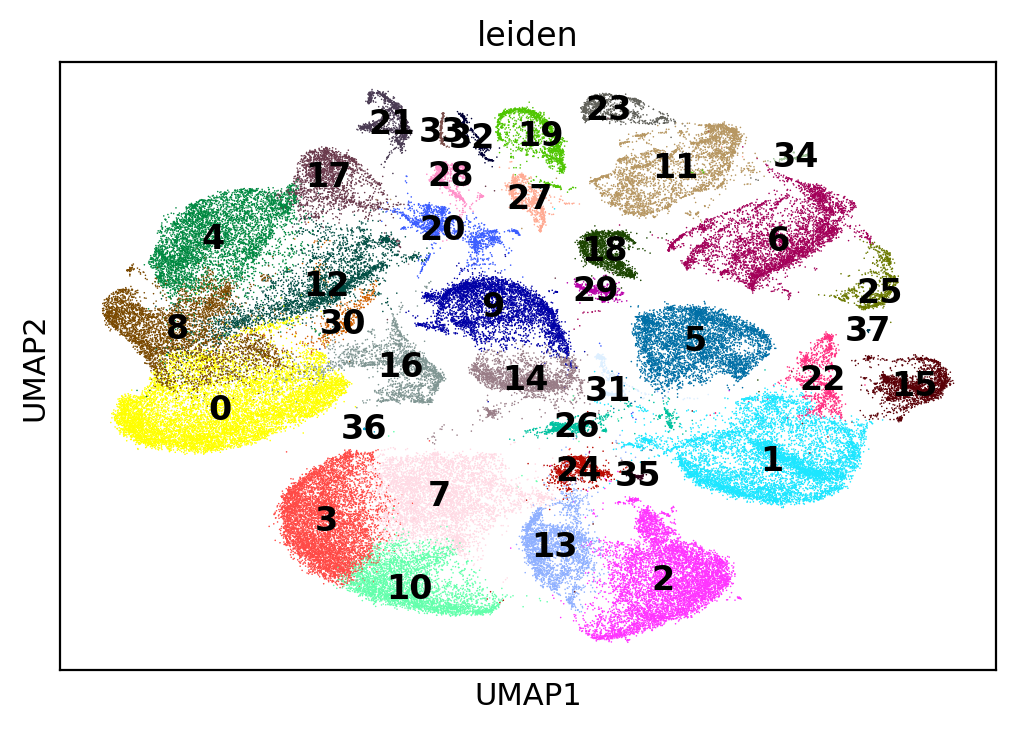

In [6]:
sc.pl.umap(mouse,color='leiden',legend_loc='on data')

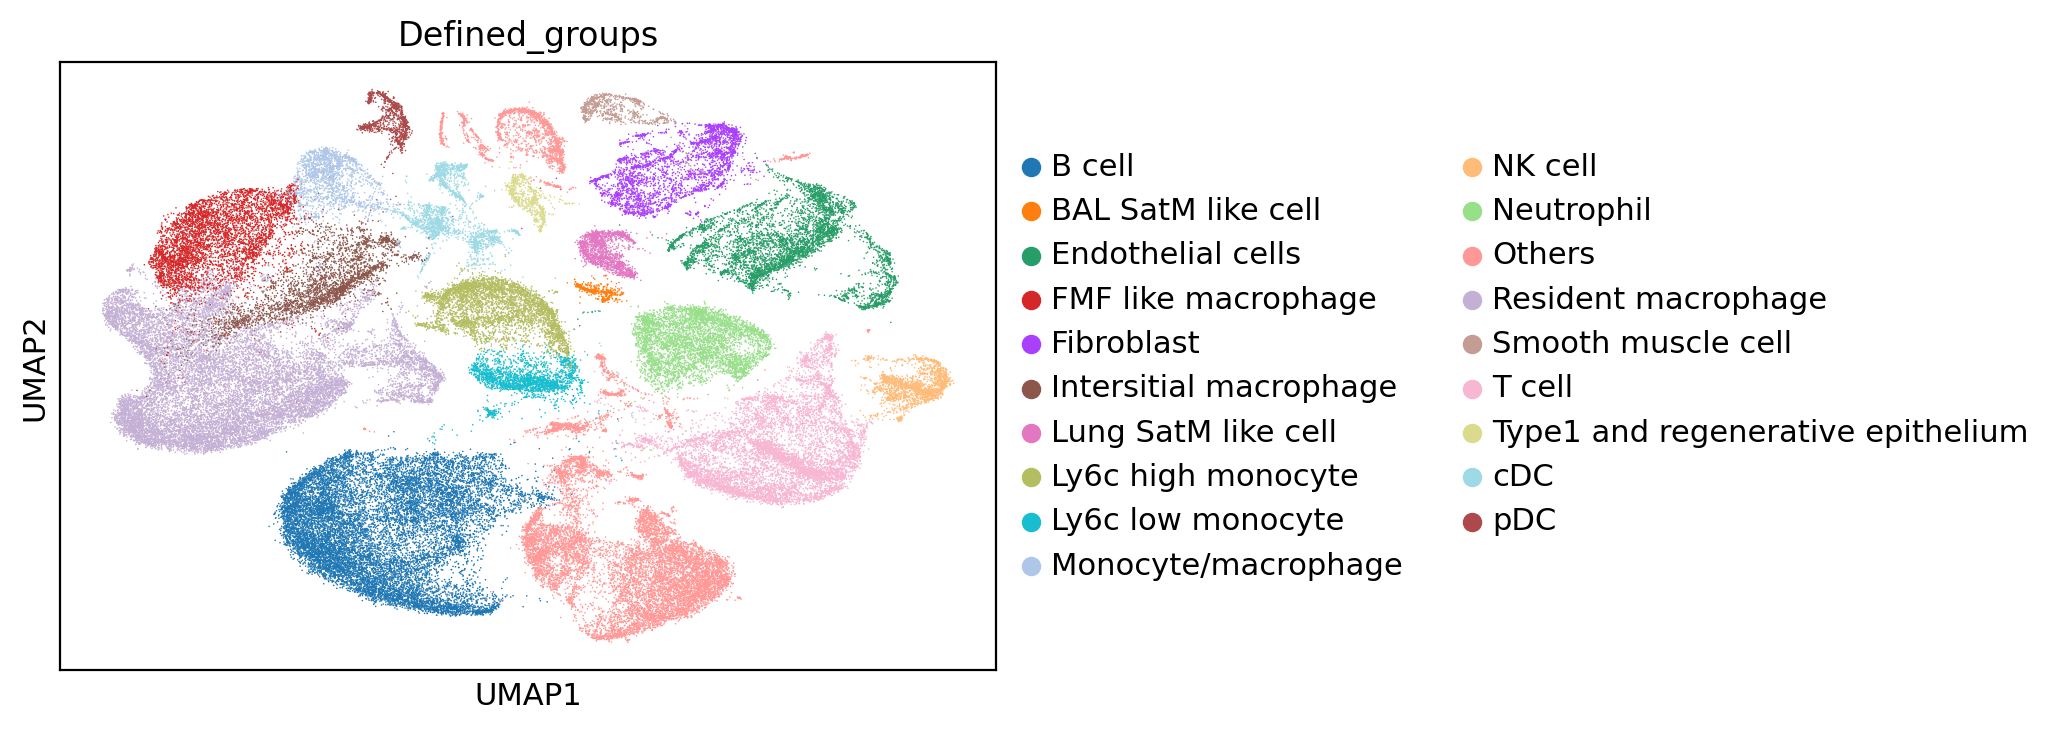

In [7]:
sc.pl.umap(mouse,color='Defined_groups')

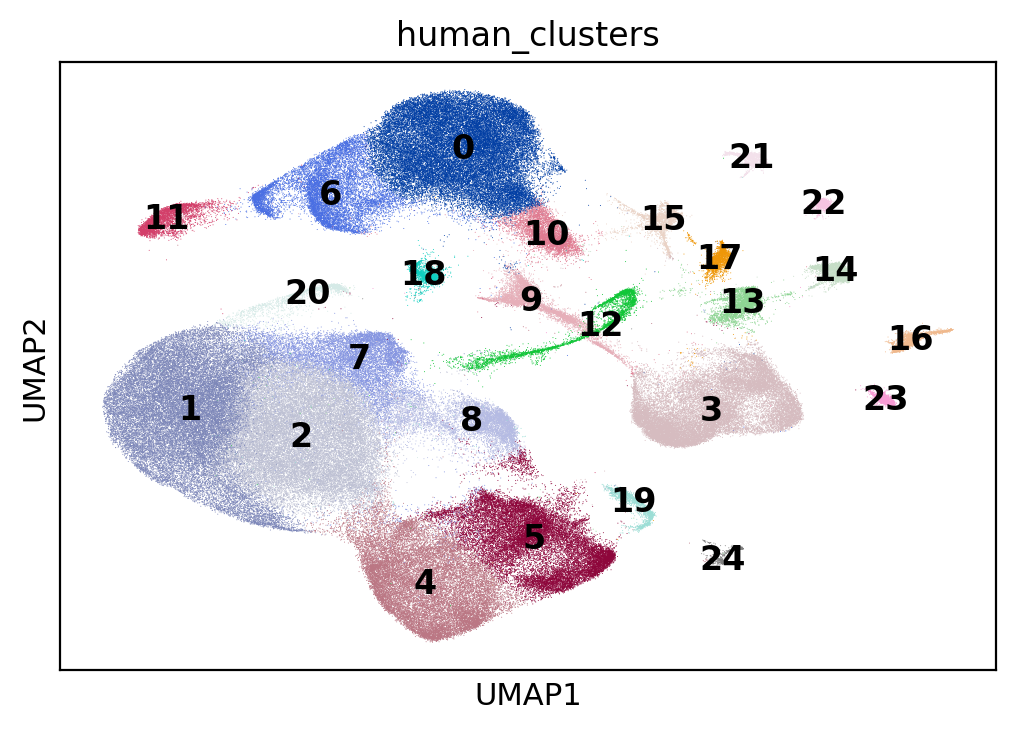

In [8]:
sc.pl.umap(human,color='human_clusters',legend_loc='on data')

In [9]:
del human.obs['Selected_group']

In [10]:
human.obs['Selected_group'] ='NA'
human.obs.loc[human.obs['human_clusters'].isin(['4']),'Selected_group'] =  'FMF like macrophage'
human.obs.loc[human.obs['human_clusters'].isin(['5']),'Selected_group'] =  'Monocyte/Macrophage'
human.obs.loc[human.obs['human_clusters'].isin(['1','2','7','8','20']),'Selected_group'] =  'Resident macrophage'
human.obs.loc[human.obs['human_clusters'].isin(['12']),'Selected_group'] =  'Proliferating macrophage'

... storing 'Selected_group' as categorical


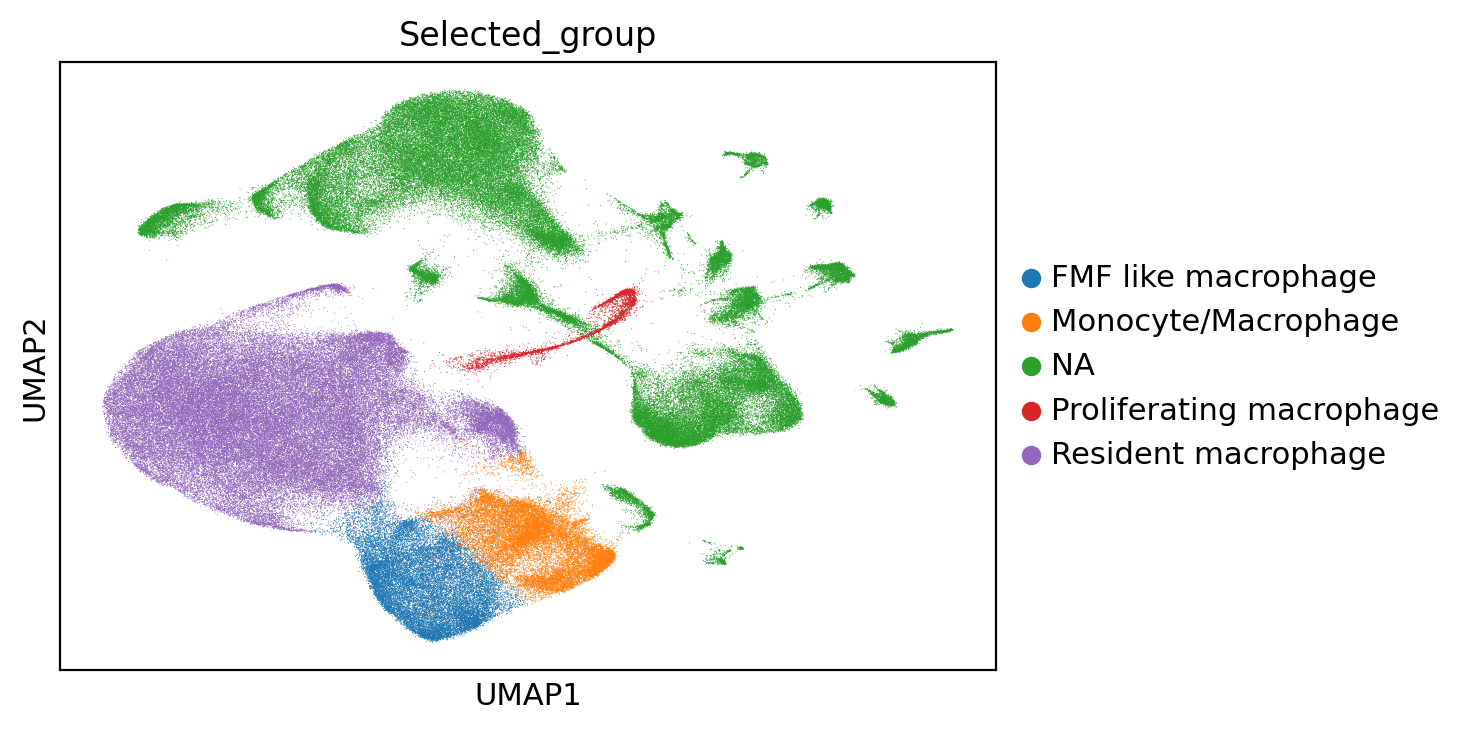

In [11]:
sc.pl.umap(human,color='Selected_group')

In [12]:

ad_ref = mouse.copy()
ad_ingest = human.copy()


In [15]:
sc.pp.pca(ad_ref)
sc.pp.neighbors(ad_ref)

In [ ]:
#memory outage 

In [16]:
var_names = ad_ref.var_names.intersection(ad_ingest.var_names)
ad_ref = ad_ref[:, var_names]
ad_ingest= ad_ingest[:, var_names]
sc.tl.ingest(ad_ingest, ad_ref, obs='Defined_groups')


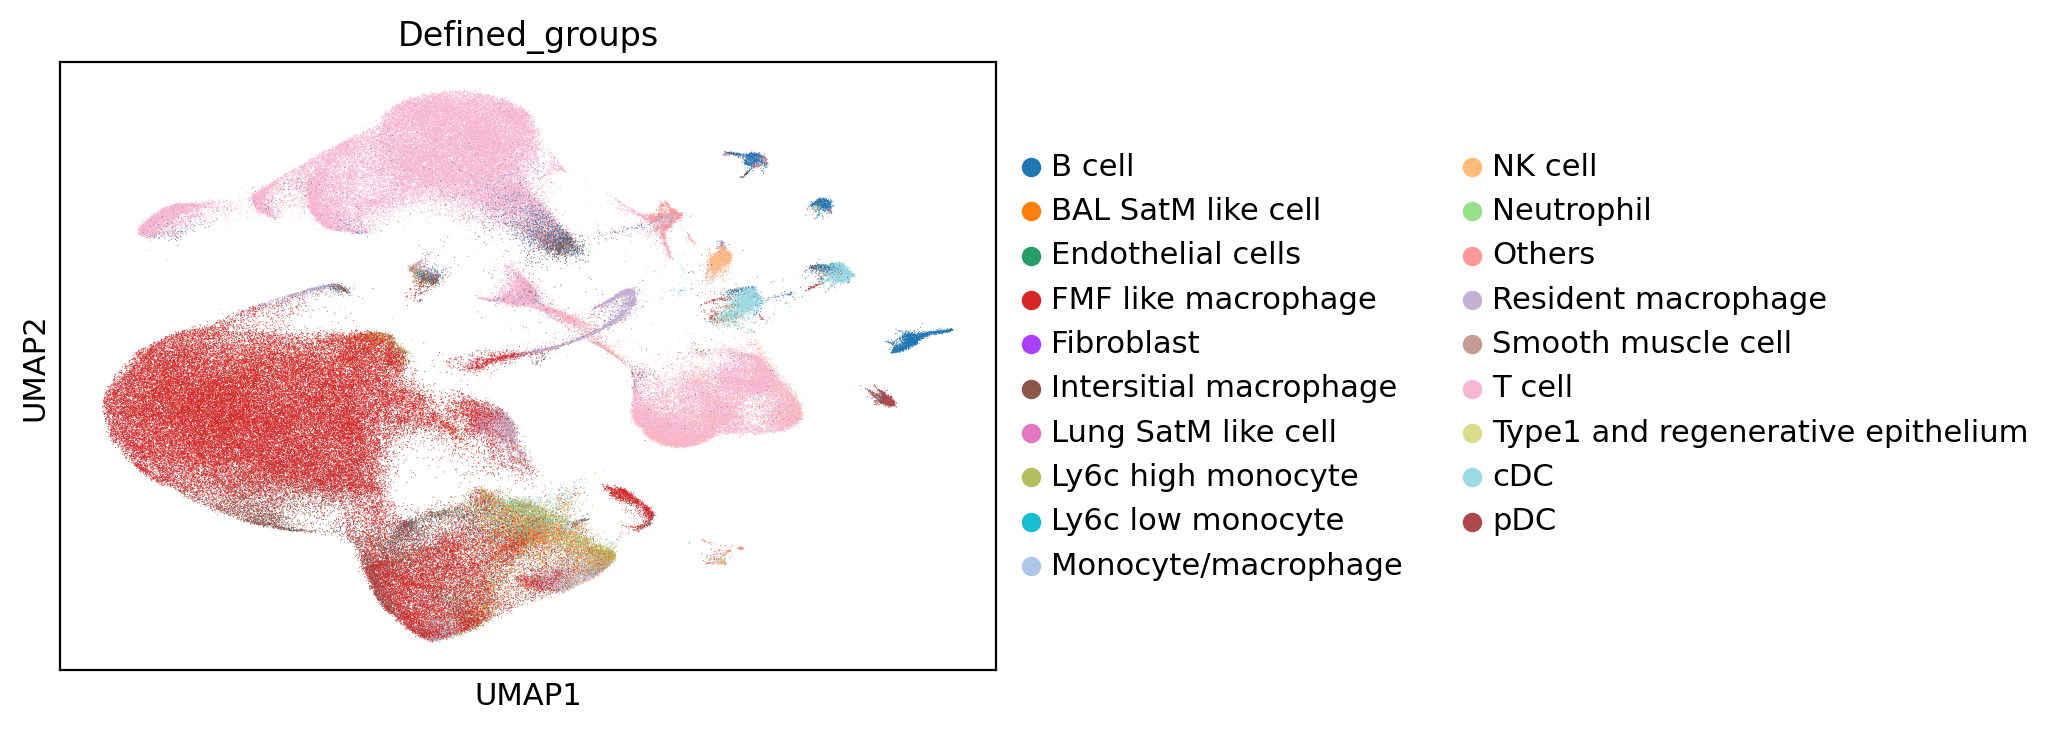

In [17]:
human.obs  = ad_ingest.obs
sc.pl.umap(human,color='Defined_groups')

In [18]:
mouse.obs['Defined_groups'].value_counts()

Resident macrophage                  16214
B cell                               15030
Others                               14096
T cell                                8625
Endothelial cells                     5439
FMF like macrophage                   5043
Neutrophil                            4904
Ly6c high monocyte                    4348
Fibroblast                            3417
Intersitial macrophage                3056
Ly6c low monocyte                     2365
cDC                                   2264
NK cell                               2031
Monocyte/macrophage                   1882
Lung SatM like cell                   1649
pDC                                   1080
Smooth muscle cell                     886
Type1 and regenerative epithelium      746
BAL SatM like cell                     522
Name: Defined_groups, dtype: int64

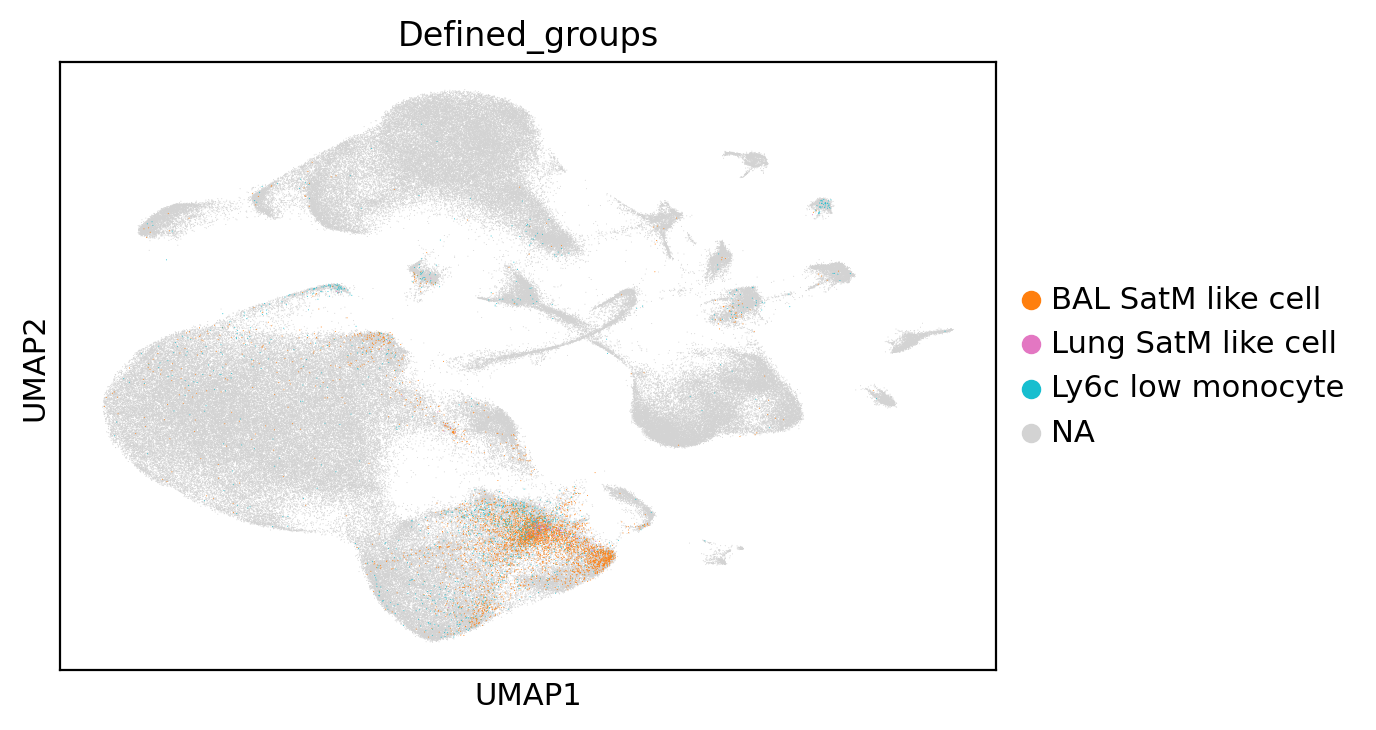

In [19]:
sc.pl.umap(human,color='Defined_groups',groups=['Lung SatM like cell','Ly6c low monocyte','BAL SatM like cell'])

... storing 'Sample' as categorical
... storing 'leiden' as categorical
... storing 'Conditions' as categorical
... storing 'Organ' as categorical
... storing 'Cell_Type' as categorical
... storing 'phase' as categorical
... storing 'clusters_gradients' as categorical
... storing 'condition' as categorical
... storing 'human_clusters' as categorical
... storing 'Selected_group' as categorical


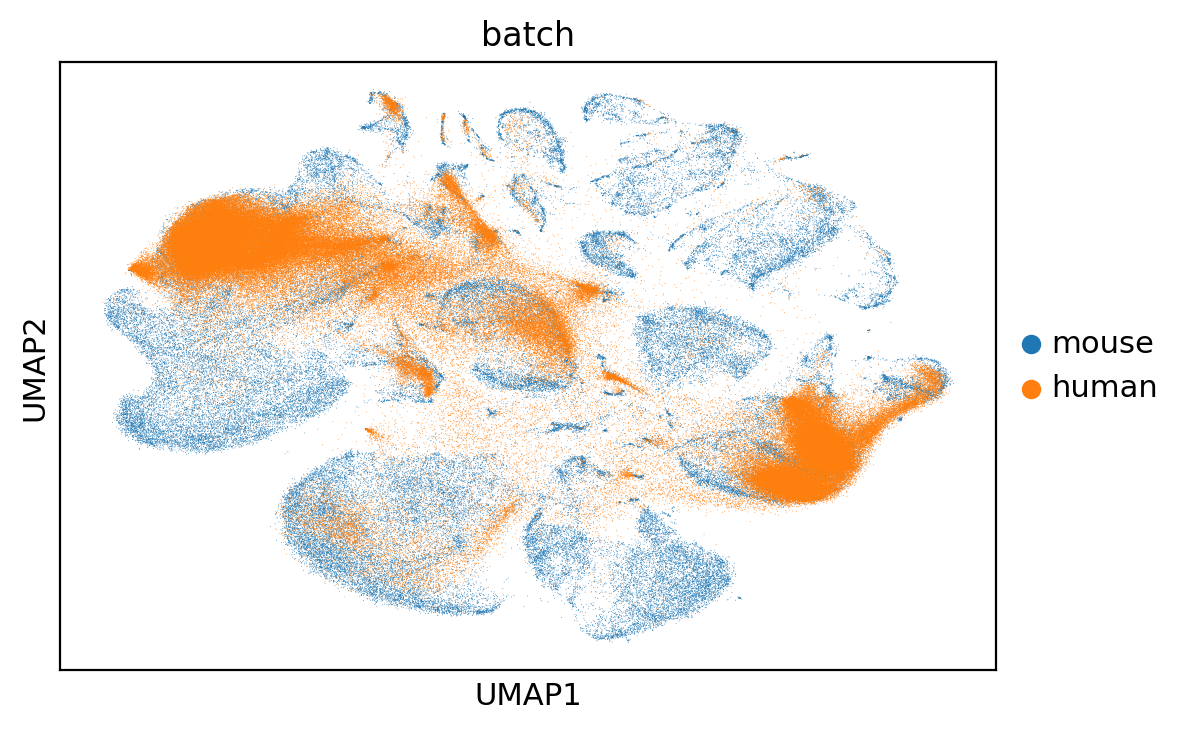

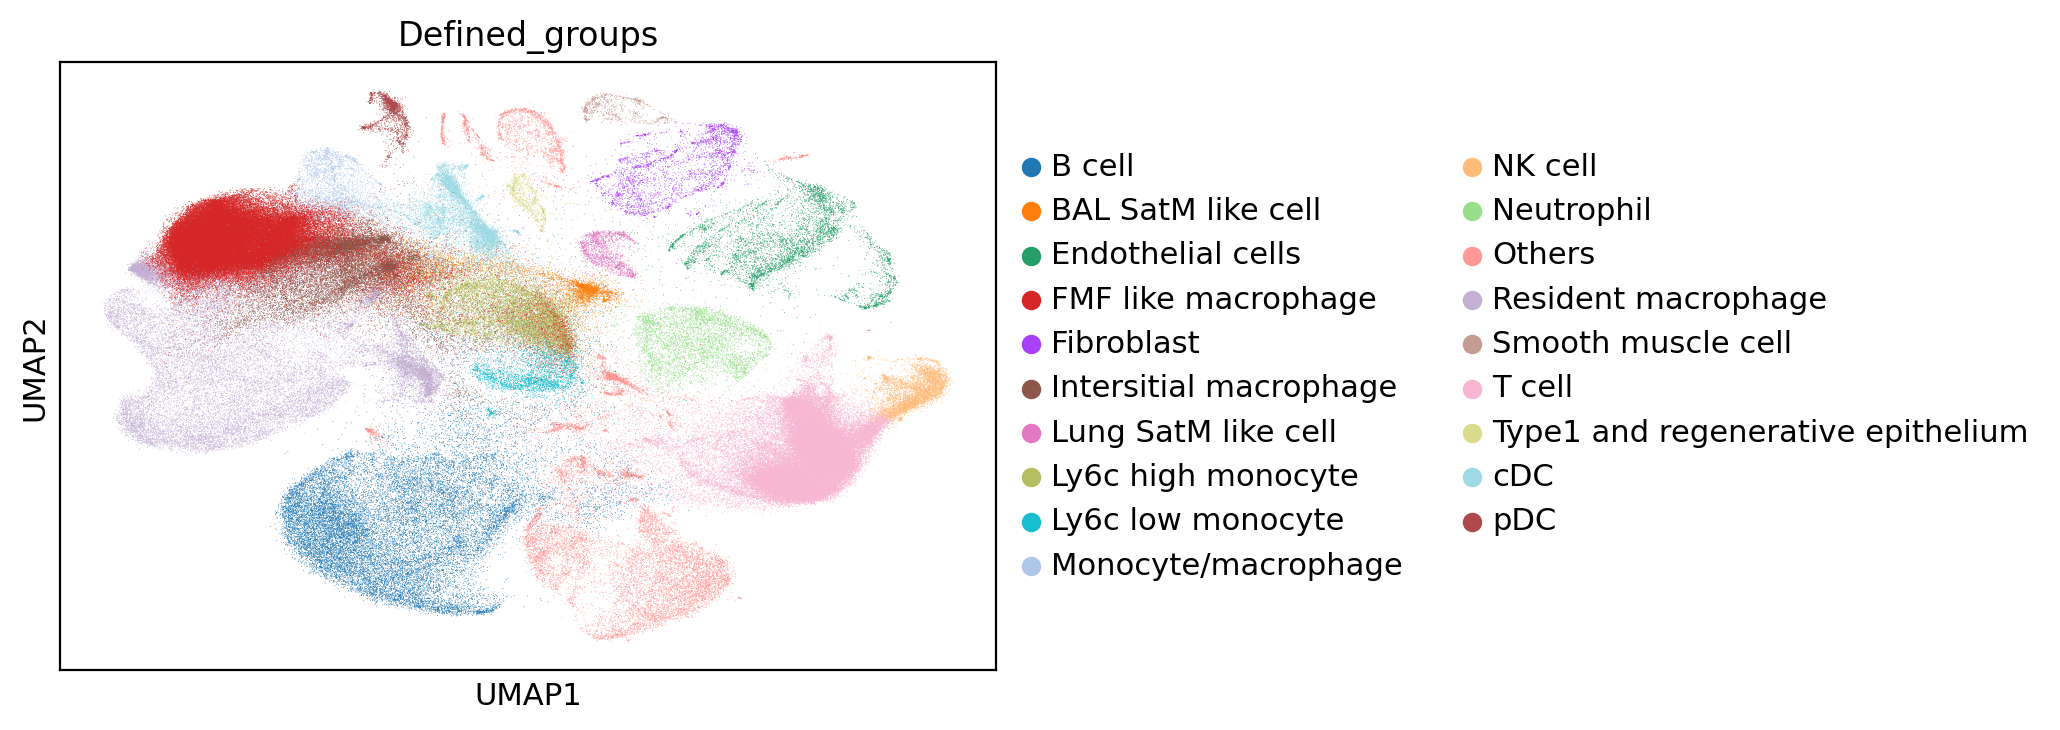

In [20]:
adata_concat = ad_ref.concatenate(ad_ingest, batch_categories=['mouse', 'human'])
sc.pl.umap(adata_concat, color='batch')
sc.pl.umap(adata_concat, color='Defined_groups')

In [22]:
human.write_h5ad(out_path+'/human_ingested_label.h5ad')

In [23]:
mouse.write_h5ad(out_path+'/mouse_labeled.h5ad')

In [25]:
del adata_concat.obs['predicted_doublet' ]
adata_concat.write_h5ad(out_path+'/mapping_human_cells_onto_mouse.h5ad')

In [26]:
from pyBCS import scanpy2bcs
scanpy2bcs.format_data(out_path+'/human_ingested_label.h5ad', out_path+'/human_label_ingested_0217.bcs',
                        input_format="h5ad", graph_based="leiden")

Writing main/metadata/metalist.json
Cannot convert Sample to numeric, treating as categorical
Cannot convert Cell_Type to numeric, treating as categorical
Cannot convert condition to numeric, treating as categorical
Cannot convert SatM_like to numeric, treating as categorical
Cannot convert Selected_group to numeric, treating as categorical
Cannot convert Defined_groups to numeric, treating as categorical
"predicted_doublet" is not numeric or categorical, ignoring
Cannot find graph based clustering in metadata with keyword "leiden", generating a fake one
Writing main/metadata/379fbe39a21249cfa331591af2161477.json
Writing main/metadata/404192a52a2a47679612488ea2479220.json
Writing main/metadata/8c98b6faca6f425da183def0c2b9594c.json
Writing main/metadata/3bdedc8744c5452b811d84c92e3a71b8.json
Writing main/metadata/2b57c500bc7e497ebc20c9c63d398af5.json
Writing main/metadata/39e85ed688a24d51867e6485e3090ec6.json
Writing main/metadata/c0aa316b31c948edb99a58f76ad489fb.json
Writing main/metada

'/user/ifrec/liuyuchen/Analysis_Reports/Akira_Fukusima_scRNASeq//human_label_ingested_0217.bcs'

In [27]:
scanpy2bcs.format_data(out_path+'/mouse_labeled.h5ad', out_path+'/mouse_labeled_0217.bcs',
                        input_format="h5ad", graph_based="leiden")

Writing main/metadata/metalist.json
Cannot convert Sample to numeric, treating as categorical
Cannot convert leiden to numeric, treating as categorical
Cannot convert Conditions to numeric, treating as categorical
Cannot convert Organ to numeric, treating as categorical
Cannot convert Cell_Type to numeric, treating as categorical
Cannot convert SatM_like to numeric, treating as categorical
Cannot convert phase to numeric, treating as categorical
Cannot convert clusters_gradients to numeric, treating as categorical
Cannot convert Defined_groups to numeric, treating as categorical
Found graph based clustering in metadata with keyword leiden
Writing main/metadata/eab493c4e70e4d02a5eb02395c17567b.json
Writing main/metadata/147bf7c79e034ec7b5414ee51a167729.json
Writing main/metadata/8d5c5a96057542e389865ebcd84ddf9d.json
Writing main/metadata/674f6c26834a41f2ad75d54ca3229708.json
Writing main/metadata/f0ce1764f1f746b7b029d02d0d2271fe.json
Writing main/metadata/88c7a3f7c44d46cca7e84f4665d7567

'/user/ifrec/liuyuchen/Analysis_Reports/Akira_Fukusima_scRNASeq//mouse_labeled_0217.bcs'

In [28]:
scanpy2bcs.format_data(out_path+'/mapping_human_cells_onto_mouse.h5ad', out_path+'/mapping_human_cells_onto_mouse_0217.bcs',
                        input_format="h5ad", graph_based="leiden")

Writing main/metadata/metalist.json
Cannot convert Sample to numeric, treating as categorical
Cannot convert batch to numeric, treating as categorical
Cannot convert leiden to numeric, treating as categorical
Cannot convert Conditions to numeric, treating as categorical
Cannot convert Organ to numeric, treating as categorical
Cannot convert Cell_Type to numeric, treating as categorical
Cannot convert SatM_like to numeric, treating as categorical
Cannot convert phase to numeric, treating as categorical
Cannot convert clusters_gradients to numeric, treating as categorical
Cannot convert Defined_groups to numeric, treating as categorical
Cannot convert condition to numeric, treating as categorical
Cannot convert Selected_group to numeric, treating as categorical
Found graph based clustering in metadata with keyword leiden
Writing main/metadata/7fdcc12e6db84bb1a9c61ff5fd45e436.json
Writing main/metadata/b32901cb854b4a1db6ee21e1730fd3c7.json
Writing main/metadata/b2024ab212a549fc933a09b28a1

'/user/ifrec/liuyuchen/Analysis_Reports/Akira_Fukusima_scRNASeq//mapping_human_cells_onto_mouse_0217.bcs'

In [5]:
from pyBCS import scanpy2bcs
scanpy2bcs.format_data(out_path+'/sub_velocity.h5ad', out_path+'/mouse_sub_velocity_0217.bcs',
                        input_format="h5ad", graph_based="leiden")

Writing main/metadata/metalist.json
Cannot convert Sample to numeric, treating as categorical
Cannot convert leiden to numeric, treating as categorical
Cannot convert Conditions to numeric, treating as categorical
Cannot convert Organ to numeric, treating as categorical
Cannot convert Cell_Type to numeric, treating as categorical
Cannot convert SatM_like to numeric, treating as categorical
Cannot convert phase to numeric, treating as categorical
Cannot convert clusters_gradients to numeric, treating as categorical
Cannot convert Defined_groups to numeric, treating as categorical
Found graph based clustering in metadata with keyword leiden
Writing main/metadata/c4e1d97c296041679c110d85506abab8.json
Writing main/metadata/fffe8026b9a54a879367f8e16f7c4d4f.json
Writing main/metadata/7b8ebe300bb141cc8f2be1cd117d8661.json
Writing main/metadata/f5149c6a431f4cae8865c0436b5fc425.json
Writing main/metadata/f43e1f2811fb4fc6904d55baad112658.json
Writing main/metadata/fc4ecbfd5e1b4ae1ac8637e48e3a322

'/user/ifrec/liuyuchen/Analysis_Reports/Akira_Fukusima_scRNASeq//mouse_sub_velocity_0217.bcs'